In [1]:
#Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#Importing the Dataset
advertising=pd.read_csv('advertising.csv')
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


C:\Users\abhinav\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


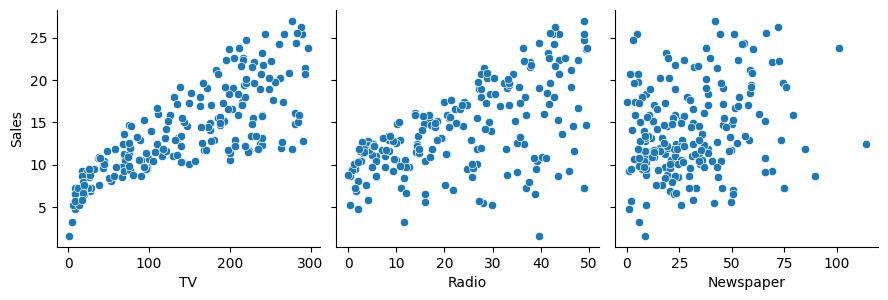

In [8]:
#Visualisation

sns.pairplot(advertising,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter',size=3)

<Axes: >

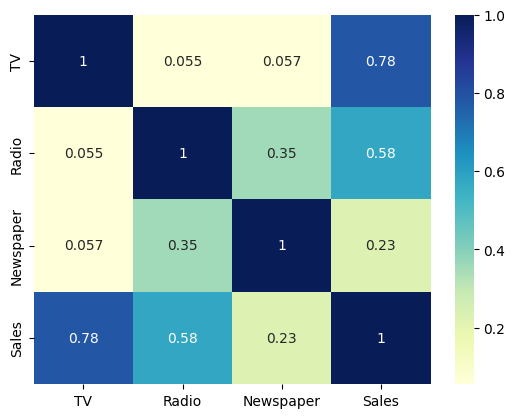

In [10]:
#Analyzing correlation with help of heatmap

sns.heatmap(advertising.corr(),cmap='YlGnBu',annot=True)

<Axes: ylabel='TV'>

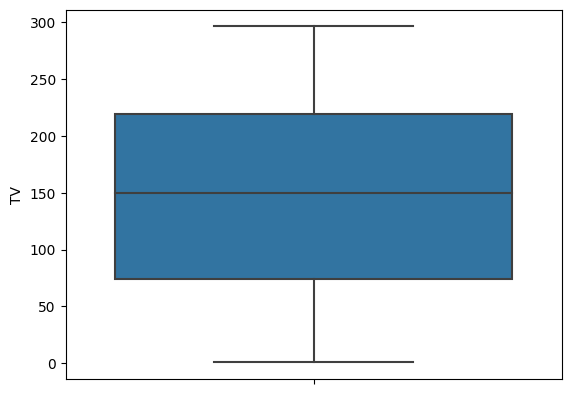

In [11]:
sns.boxplot(y='TV',data=advertising)

In [12]:
## defining the independent and dependent variables in the dataset.
#Presently working only with one independent variable 'TV'

#When the model is based on one independent variable it results in Simple Linear regression Model

X=advertising['TV']

Y=advertising['Sales']

In [14]:
#Splitting the data into Train and Test (with split ratio = 70-30)

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

In [17]:
# we reshape it

X_train=X_train.values.reshape(-1, 1)

In [23]:
# we reshape it

X_test=X_test.values.reshape(-1, 1)

In [15]:
# Instantiating the LinearRegression() model

lm=LinearRegression()

In [18]:
#Fitting the model and getting the parameter values:

lm.fit(X_train,y_train)

LinearRegression()

In [20]:
#slope  #regression coefficient

print(lm.intercept_)
print(lm.coef_)

6.745302251222065
[0.05024351]


In [24]:
# prediction

y_test_pred=lm.predict(X_test)

y_train_pred=lm.predict(X_train)

In [25]:
#Calculating the metric for training and testing dataset

print(r2_score(y_train,y_train_pred))

0.6411433688483876


In [26]:
#Calculating the metric for training and testing dataset

print(r2_score(y_test,y_test_pred))

0.5111616978794153


In [ ]:
# adjust r_square

In [34]:
X_test.shape

(60, 1)

In [36]:
n=X_test.shape[0]
k=X_test.shape[1]
x=r2_score(y_test,y_test_pred)

In [37]:
adj_r2=1-((1-x)*(n-1)/(n-k-1))
print(adj_r2)

0.5027334512911295


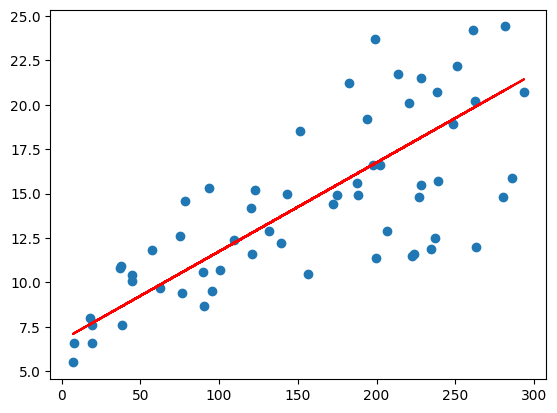

In [39]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.745+0.050*X_test,'r')
plt.show()

In [ ]:
# Multiple Linear Regression model (with more than 1 independent variables)

In [40]:
advertising=pd.read_csv('advertising.csv')

In [41]:
feature=['TV','Radio','Newspaper']
X_all=advertising[feature]
y=advertising.Sales

In [43]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [44]:
# Train_test_split the new data

X_train,X_test,y_train,y_test=train_test_split(X_all,y,test_size=0.3,random_state=5)

In [45]:
# scaling

from sklearn.preprocessing import RobustScaler
rs=RobustScaler()

In [46]:
X_all_train=rs.fit_transform(X_train)
X_all_test=rs.transform(X_test)

In [47]:
# instantiate and fit

lm2=LinearRegression()
lm2.fit(X_all_train,y_train)
y_train_pred=lm2.predict(X_all_train)
y_test_pred=lm2.predict(X_all_test)

In [48]:
#Calculating the metric for training and testing dataset

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8997682984995
0.8868821951328664


In [49]:
# adj r2_square

n=X_all_test.shape[0]
k=X_all_test.shape[1]
x=r2_score(y_test,y_test_pred)
adj_r2=1-((1-x)*(n-1)/(n-k-1))
print(adj_r2)

0.8808223127292699


In [50]:
# RMSE

print('the mse is ', mean_squared_error(y_test,y_test_pred))
print('the mse is ', np.sqrt(mean_squared_error(y_test,y_test_pred)))

the mse is  2.504406518845738
the mse is  1.582531680202876
